In [1]:
#Question: 1.do I know if the dealer is offering fair value for my trade-in?
#2. do I know if I put a fair value on my car?

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#path of data

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


# Linear Regression 

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
#create linear regression object

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#define predictor/target variable

X = df[['highway-mpg']] #predictor
Y = df['price'] #target

In [9]:
#fit the model

lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#output a Prediction

Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [14]:
#value of intercept

lm.intercept_

38423.305858157386

In [15]:
#value of slope

lm.coef_

array([-821.73337832])

In [17]:
#price = 38423.31 - 821.73 x highway-mpg

In [24]:
#2.

#create object 
lm1 = LinearRegression()
lm1

#Train the model using 'engine-size' as X and 'price' as Y
lm1.fit(df[['engine-size']], df[['price']])
lm1

#slope and intercept
lm1.intercept_
lm1.coef_

#predicted line
    #Yhat=-7963.34 + 166.86*X

    #Price=-7963.34 + 166.86*engine-size

array([[166.86001569]])

# Multiple Linear Regression

In [25]:
#method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

In [26]:
#a model using variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [29]:
#train the model
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#intercept and slope
print("intercept: ", lm.intercept_)
print("slope: ", lm.coef_)

#linear function
    #Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

intercept:  -15806.624626329198
slope:  [53.49574423  4.70770099 81.53026382 36.05748882]


# Model evaluation using visualization 

In [35]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

## Regression plot

(0, 48159.36658453506)

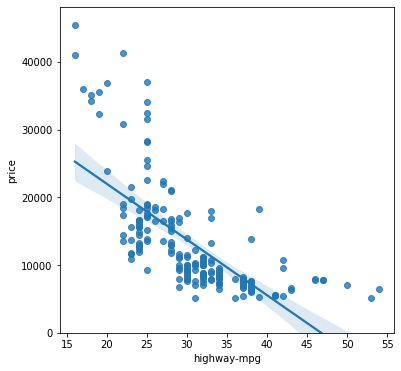

In [45]:

# estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

width = 6
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,) #set the y-limits of current axes

#negatively correlated to highway-mpg

In [41]:
#The variable "highway-mpg" has a stronger correlation with "price", 
#it is approximate -0.704692  compared to   "peak-rpm" which is approximate -0.101616. You can verify it using the following command:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


## Residual Plot

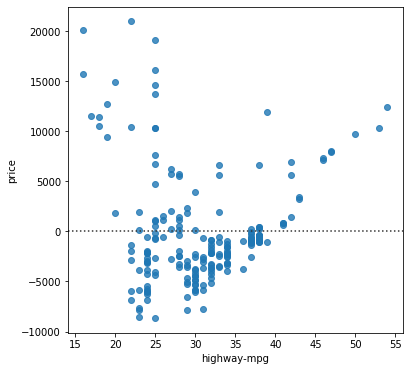

In [44]:
width = 6
height = 6
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

#not randomly spread out around x-axis, which tells that non-linear model is more appropriate for this data


# Multiple Linear Regression 

In [50]:
#make a prediction
Y_hat = lm.predict(Z)

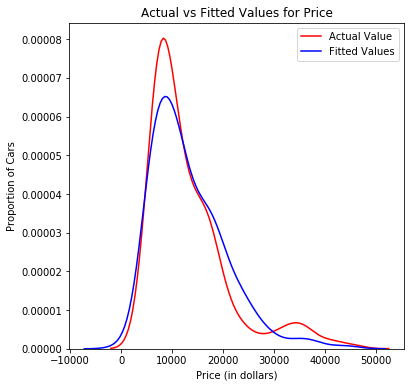

In [51]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

#fitted values are reasonably close to the actual values since two distributions overlap a bit


# Polynomial Regression

In [53]:
#function for plotting data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [54]:
#get the variables
x = df['highway-mpg']
y = df['price']

In [56]:
#fit the polynomial 
# 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


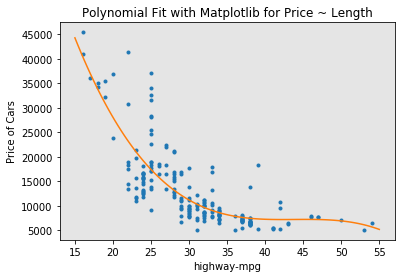

In [57]:
PlotPolly(p, x, y, 'highway-mpg')

In [58]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [59]:
#polynomial function is better than the linear model

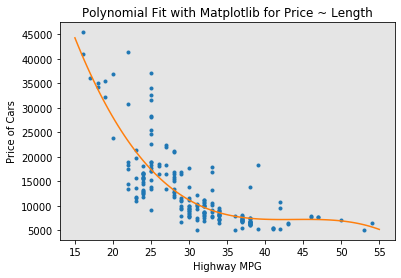

In [61]:
# 11th order

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f)

PlotPolly(p1,x,y, 'Highway MPG')

In [64]:
#polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures

In [63]:
#create object
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [65]:
#transform the array
Z_pr = pr.fit_transform(Z)

In [66]:
Z.shape

(201, 4)

In [67]:
#after the transformation, there are 201 samples with 15 featrues
Z_pr.shape

(201, 15)

## Pipeline

In [69]:
#import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [70]:
#pipe line simplifies the steps of processing data

#create list of tuples incdluing name of the model and corresponding constructor
Input=[('scale',StandardScaler()), 
       ('polynomial', PolynomialFeatures(include_bias=False)), 
       ('model',LinearRegression())]

In [72]:
#pipeline construtor

pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [74]:
#normalize data, perform transfor and fit model simultaneously

pipe.fit(Z,y) 

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [75]:
#normalize data, prediction simultaneously

ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Measures for in sample evaluation

In [77]:
#quantitative measure to determine the accuracy of the model

#Simple Linear Regression

#R^2

#highway_mpg_fit
lm.fit(X,Y)
#find R^2
print('The R^2 is: ', lm.score(X, Y))

The R^2 is:  0.4965911884339175


In [80]:
#MSE

#predicted output
yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat [0:4])

#import the module metrics
from sklearn.metrics import mean_squared_error

#compare the predicted results with the actual results 
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]
The mean square error of price and predicted value is:  31635042.944639895


In [ ]:
# Multiple Linear Regression

In [83]:
#fit the model 
lm.fit(Z, df['price'])

#find R^2
print(lm.score(Z, df['price']))

0.8093562806577457


In [86]:
#Calculate the MSE

Y_predicted_multifit = lm.predict(Z)

print('The mean square error of price and predicted value using multifit is : ', \
     mean_squared_error(df['price'], Y_predicted_multifit ))

The mean square error of price and predicted value using multifit is :  11980366.87072649


In [87]:
# polynomial fit 

In [89]:
from sklearn.metrics import r2_score

In [90]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

#~ 67.419 % of the variation of price is explained 

The R-square value is:  0.674194666390652


In [91]:
# MSE

mean_squared_error(df['price'], p(x))

20474146.426361218

# Prediction 

In [94]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [95]:
# create new input
new_input = np.arange(1,100,1).reshape(-1,1)

In [96]:
#fit the model
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
#produce prediction
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

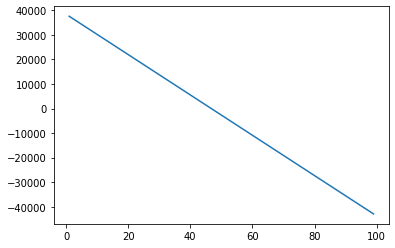

In [102]:
#plot data
plt.plot(new_input, yhat)
plt.show()

Decision making:


The model with the higher R^2 value is a better fit for the data, and the model with the smallest MSE value is a better fit for the data.
Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.49659118843391759
MSE: 3.16 x10^7
Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

R-squared: 0.80896354913783497
MSE: 1.2 x10^7
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

R-squared: 0.6741946663906514
MSE: 2.05 x 10^7

MSEThe MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.

R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR. Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

> Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.